In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -q "/content/drive/MyDrive/hw1.zip"

unzip:  cannot find or open /content/drive/MyDrive/hw1.zip, /content/drive/MyDrive/hw1.zip.zip or /content/drive/MyDrive/hw1.zip.ZIP.


In [ ]:
!pwd

/content


In [ ]:
!unzip -q "/content/hw1.zip"

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "cifar10"]:
        data = np.load(f"hw1/data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


**Problem 2: Data Partitioning**

In [ ]:
from random import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
mnist = np.load(f"hw1/data/mnist-data.npz")

old_train = mnist['training_data']
old_labels = mnist["training_labels"]
seeding = []
val_data = []
val_labels = []

new_train = [0] * 50000
new_labels = [0] * 50000

for i in range(0, 60000):
  seeding.append(i)

shuffle(seeding)

for j in range(0, 50000):
  new_train[j] = old_train[seeding[j]]
  new_labels[j] = old_labels[seeding[j]]  

for k in range(50000,60000):
  val_data.append(old_train[seeding[k]])
  val_labels.append(old_labels[seeding[k]])

In [ ]:
# These methods are to flatten MNIST data for SVM model.

def trainer(numb):
  n = []
  for i in range(numb):
    x = []
    for j in range(len(new_train[i][0])):
      for k in new_train[i][0][j]:
        x.append(k)
    n.append(x)
  return n

def trainer1(numi):
  n = []
  for i in range(numi):
    x = []
    for j in range(len(val_data[i][0])):
      for k in val_data[i][0][j]:
        x.append(k)
    n.append(x)
  return n

def trainer2(q):
  td = mnist['test_data']
  n = []
  for i in range(q):
    x = []
    for j in range(len(td[i][0])):
      for k in td[i][0][j]:
        x.append(k)
    n.append(x)
  return n

In [ ]:
spam = np.load(f"hw1/data/spam-data.npz")

sold_train = spam['training_data']
sold_labels = spam["training_labels"]
spart = int(.80*len(sold_train))
sseeding = []
sval_data = []
sval_labels = []

snew_train = [0] * spart
snew_labels = [0] * spart

for si in range(0, len(sold_train)):
  sseeding.append(si)

shuffle(sseeding)

#spart = int(.80*len(sold_train))
for sj in range(0, spart):
  snew_train[sj] = sold_train[sseeding[sj]]
  snew_labels[sj] = sold_labels[sseeding[sj]]  

for sk in range(spart, len(sold_train)):
  sval_data.append(sold_train[sseeding[sk]])
  sval_labels.append(sold_labels[sseeding[sk]])

In [ ]:
cifar = np.load(f"hw1/data/cifar10-data.npz")

cold_train = cifar['training_data']
cold_labels = cifar["training_labels"]
cseeding = []
cval_data = []
cval_labels = []

cnew_train = [0] * 45000
cnew_labels = [0] * 45000

for ci in range(0, 50000):
  cseeding.append(ci)

shuffle(cseeding)

for cj in range(0, 45000):
  cnew_train[cj] = cold_train[cseeding[cj]]
  cnew_labels[cj] = cold_labels[cseeding[cj]]  

for ck in range(45000, 50000):
  cval_data.append(cold_train[cseeding[ck]])
  cval_labels.append(cold_labels[cseeding[ck]])

**Problem 3: Support Vector Machines**

MNIST

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train = trainer(100)
y_train = new_labels[:100]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
one_training = (accuracy_score(y_train, y__pred))
one_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(200)
y_train = new_labels[:200]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
two_training = (accuracy_score(y_train, y__pred))
two_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(500)
y_train = new_labels[:500]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
five_training = (accuracy_score(y_train, y__pred))
five_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(1000)
y_train = new_labels[:1000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
ten_training = (accuracy_score(y_train, y__pred))
ten_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(2000)
y_train = new_labels[:2000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
twe_training = (accuracy_score(y_train, y__pred))
twe_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(5000)
y_train = new_labels[:5000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
fif_training = (accuracy_score(y_train, y__pred))
fif_vali = (accuracy_score(y_test,y_pred))

In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)
asdt = (accuracy_score(y_train, y__pred))
asdv = (accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'MNIST validation and training scores')

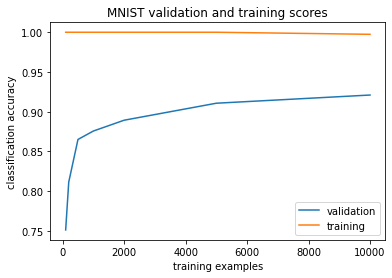

In [ ]:
valis = [one_vali, two_vali, five_vali, ten_vali, twe_vali, fif_vali, asdv]
trains = [one_training, two_training, five_training, ten_training, twe_training, fif_training, asdt]
nums = [100, 200, 500, 1000, 2000, 5000, 10000]
plt.plot(nums, valis, label = "validation")
plt.plot(nums, trains, label = "training")
plt.ylabel("classification accuracy")
plt.xlabel("training examples")
plt.legend()
plt.title("MNIST validation and training scores")

SPAM

In [ ]:
x_train = snew_train[:100]
y_train = snew_labels[:100]

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v1 = (accuracy_score(y_test,y_pred))
t1 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = snew_train[:200]
y_train = snew_labels[:200]

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v2 = (accuracy_score(y_test,y_pred))
t2 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = snew_train[:500]
y_train = snew_labels[:500]

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v3 = (accuracy_score(y_test,y_pred))
t3 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = snew_train[:1000]
y_train = snew_labels[:1000]

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v4 = (accuracy_score(y_test,y_pred))
t4 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = snew_train[:2000]
y_train = snew_labels[:2000]

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v5 = (accuracy_score(y_test,y_pred))
t5 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = snew_train
y_train = snew_labels

x_test = sval_data
y_test = sval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

v6 = (accuracy_score(y_test,y_pred))
t6 = (accuracy_score(y_train,y__pred))

Text(0.5, 1.0, 'spam validation and training scores')

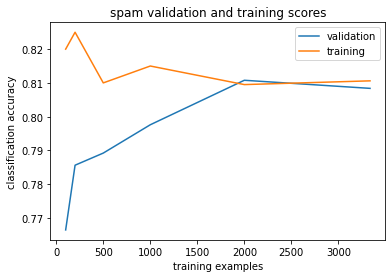

In [ ]:
valis = [v1, v2, v3, v4, v5, v6]
trains = [t1, t2, t3, t4, t5, t6]
nums = [100, 200, 500, 1000, 2000, len(snew_train)]
plt.plot(nums, valis, label = "validation")
plt.plot(nums, trains, label = "training")
plt.ylabel("classification accuracy")
plt.xlabel("training examples")
plt.legend()
plt.title("spam validation and training scores")

CIFAR-10

In [ ]:
cifar = np.load(f"hw1/data/cifar10-data.npz")

cold_train = cifar['training_data']
cold_labels = cifar["training_labels"]
cseeding = []
cval_data = []
cval_labels = []

cnew_train = [0] * 45000
cnew_labels = [0] * 45000

for ci in range(0, 50000):
  cseeding.append(ci)

shuffle(cseeding)

for cj in range(0, 45000):
  cnew_train[cj] = cold_train[cseeding[cj]]
  cnew_labels[cj] = cold_labels[cseeding[cj]]  

for ck in range(45000, 50000):
  cval_data.append(cold_train[cseeding[ck]])
  cval_labels.append(cold_labels[cseeding[ck]])

In [ ]:
x_train = cnew_train[:100]
y_train = cnew_labels[:100]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c1 = accuracy_score(y_test,y_pred)
x1 = accuracy_score(y_train,y__pred)

In [ ]:
x_train = cnew_train[:200]
y_train = cnew_labels[:200]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c2 = (accuracy_score(y_test,y_pred))
x2 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = cnew_train[:500]
y_train = cnew_labels[:500]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c3 = (accuracy_score(y_test,y_pred))
x3 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = cnew_train[:1000]
y_train = cnew_labels[:1000]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c4 = (accuracy_score(y_test,y_pred))
x4 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = cnew_train[:2000]
y_train = cnew_labels[:2000]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c5 = (accuracy_score(y_test,y_pred))
x5 = (accuracy_score(y_train,y__pred))

In [ ]:
x_train = cnew_train[:5000]
y_train = cnew_labels[:5000]

x_test = cval_data
y_test = cval_labels

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y__pred = clf.predict(x_train)

c6 = (accuracy_score(y_test,y_pred))
x6 = (accuracy_score(y_train,y__pred))

Text(0.5, 1.0, 'cifar validation and training scores')

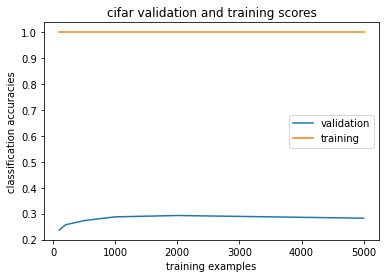

In [ ]:
valis = [c1, c2, c3, c4, c5, c6]
trains = [x1, x2, x3, x4, x5, x6]
nums = [100, 200, 500, 1000, 2000, 5000]
plt.plot(nums, valis, label = "validation")
plt.plot(nums, trains, label = "training")
plt.xlabel("training examples")
plt.ylabel("classification accuracies")
plt.legend()
plt.title("cifar validation and training scores")

**Problem 4: Hyperparameter Tuning**

In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .001, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.901


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .01, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9238


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .1, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9285


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 1, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.921


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 3, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9168


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 9, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9159


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 27, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9159


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 81, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9159


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .05, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9294


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .08, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9287


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .06, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.93


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .07, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9283


In [ ]:
x_train = trainer(10000)
y_train = new_labels[:10000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = 100, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9159


In [ ]:
x_train = trainer(50000)
y_train = new_labels[:50000]

x_test = trainer1(10000)
y_test = val_labels

clf = SVC(C = .06, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9411


**Problem 5: K-Fold Cross-Validation**

In [ ]:
spam = np.load(f"hw1/data/spam-data.npz")
spam_train = spam["training_data"]
spam_labels = spam["training_labels"]

new_spam_train = []
new_spam_labels = []

seeds = []
for i in range(len(spam_train)):
  seeds.append(i)

shuffle(seeds)

for j in range(len(spam_train)):
  new_spam_train.append(spam_train[seeds[j]])
  new_spam_labels.append(spam_labels[seeds[j]])

In [ ]:
def five_fold(c):
  numb = (len(new_spam_train)//5)
  first_partition = new_spam_train[:numb]
  first_labels = new_spam_labels[:numb]

  second_partition = new_spam_train[numb: 2*numb]
  second_labels = new_spam_labels[numb:2*numb]

  third_partition = new_spam_train[2*numb: 3*numb]
  third_labels = new_spam_labels[2*numb:3*numb]

  fourth_partition = new_spam_train[3*numb: 4*numb]
  fourth_labels = new_spam_labels[3*numb:4*numb]

  fifth_partition = new_spam_train[4*numb:]
  fifth_labels = new_spam_labels[4*numb:]


  x_train = second_partition+third_partition+fourth_partition+fifth_partition
  y_train = second_labels+third_labels+fourth_labels+fifth_labels

  x_test = first_partition
  y_test = first_labels

  clf = SVC(C = c, kernel='linear')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  oneval = accuracy_score(y_test,y_pred)

  x_train = first_partition+third_partition+fourth_partition+fifth_partition
  y_train = first_labels+third_labels+fourth_labels+fifth_labels

  x_test = second_partition
  y_test = second_labels

  clf = SVC(C = c, kernel='linear')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  twoval = accuracy_score(y_test,y_pred)

  x_train = second_partition+first_partition+fourth_partition+fifth_partition
  y_train = second_labels+first_labels+fourth_labels+fifth_labels

  x_test = third_partition
  y_test = third_labels

  clf = SVC(C = c, kernel='linear')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  threeval = accuracy_score(y_test,y_pred)  

  x_train = second_partition+third_partition+first_partition+fifth_partition
  y_train = second_labels+third_labels+first_labels+fifth_labels

  x_test = fourth_partition
  y_test = fourth_labels

  clf = SVC(C = c, kernel='linear')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fourval = accuracy_score(y_test,y_pred)

  x_train = second_partition+third_partition+fourth_partition+first_partition
  y_train = second_labels+third_labels+fourth_labels+first_labels

  x_test = fifth_partition
  y_test = fifth_labels

  clf = SVC(C = c, kernel='linear')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fiveval = accuracy_score(y_test,y_pred)

  avg = (oneval + twoval + threeval + fourval + fiveval) / 5
  return avg

In [ ]:
five_fold(.01)

0.7787712413801017

In [ ]:
five_fold(.1)

0.7950672954459399

In [ ]:
five_fold(.5)

0.8005800144573337

In [ ]:
five_fold(1)

0.8008186752033779

In [ ]:
five_fold(2)

0.8020159948596147

In [ ]:
five_fold(4)

0.8024921689442704

In [ ]:
five_fold(8)

0.8027319770977476

In [ ]:
five_fold(16)

0.8036912097116564

In [ ]:
five_fold(32)

0.803211593404702

In [ ]:
five_fold(.001)

0.74713090771402

In [ ]:
five_fold(12)

0.8027319770977476

In [ ]:
five_fold(24)

0.8029717852512249

**6. Kaggle**

MNIST

In [ ]:
x_train = trainer(50000)
y_train = new_labels[:50000]

x_test = trainer2(10000)

clf = SVC(C = .06, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
ls = [i for i in range(1, 10001)]
pred = pd.DataFrame(y_pred,columns=['Category'])
pred['id'] = ls
pred.set_index('id', inplace = True)
pred.to_csv(f"mnistsub5.csv")

SPAM

In [ ]:
'''
**************** PLEASE READ ***************

Script that reads in spam and ham messages and converts each training example
into a feature vector

Code intended for UC Berkeley course CS 189/289A: Machine Learning

Requirements:
-scipy ('pip install scipy')

To add your own features, create a function that takes in the raw text and
word frequency dictionary and outputs a int or float. Then add your feature
in the function 'def generate_feature_vector'

The output of your file will be a .mat file. The data will be accessible using
the following keys:
    -'training_data'
    -'training_labels'
    -'test_data'

Please direct any bugs to kevintee@berkeley.edu
'''

from collections import defaultdict
import glob
import re
import scipy.io
import numpy as np
import pdb

NUM_TRAINING_EXAMPLES = 4172
NUM_TEST_EXAMPLES = 1000

BASE_DIR = 'hw1/data/'
SPAM_DIR = 'spam/'
HAM_DIR = 'ham/'
TEST_DIR = 'test/'

# ************* Features *************

# Features that look for certain words
def freq_pain_feature(text, freq):
    return float(freq['pain'])

def freq_private_feature(text, freq):
    return float(freq['private'])

def freq_bank_feature(text, freq):
    return float(freq['bank'])

def freq_money_feature(text, freq):
    return float(freq['money'])

def freq_drug_feature(text, freq):
    return float(freq['drug'])

def freq_spam_feature(text, freq):
    return float(freq['spam'])

def freq_prescription_feature(text, freq):
    return float(freq['prescription'])

def freq_creative_feature(text, freq):
    return float(freq['creative'])

def freq_height_feature(text, freq):
    return float(freq['height'])

def freq_featured_feature(text, freq):
    return float(freq['featured'])

def freq_differ_feature(text, freq):
    return float(freq['differ'])

def freq_width_feature(text, freq):
    return float(freq['width'])

def freq_other_feature(text, freq):
    return float(freq['other'])

def freq_energy_feature(text, freq):
    return float(freq['energy'])

def freq_business_feature(text, freq):
    return float(freq['business'])

def freq_message_feature(text, freq):
    return float(freq['message'])

def freq_volumes_feature(text, freq):
    return float(freq['volumes'])

def freq_revision_feature(text, freq):
    return float(freq['revision'])

def freq_path_feature(text, freq):
    return float(freq['path'])

def freq_meter_feature(text, freq):
    return float(freq['meter'])

def freq_memo_feature(text, freq):
    return float(freq['memo'])

def freq_planning_feature(text, freq):
    return float(freq['planning'])

def freq_pleased_feature(text, freq):
    return float(freq['pleased'])

def freq_record_feature(text, freq):
    return float(freq['record'])

def freq_out_feature(text, freq):
    return float(freq['out'])

def freq_penis_feature(text, freq):
    return float(freq['penis'])

def freq_free_feature(text, freq):
    return float(freq['free'])

def freq_use_feature(text, freq):
    return float(freq['use'])

def freq_order_feature(text, freq):
    return float(freq['order'])

# Features that look for certain characters
def freq_semicolon_feature(text, freq):
    return text.count(';')

def freq_dollar_feature(text, freq):
    return text.count('$')

def freq_sharp_feature(text, freq):
    return text.count('#')

def freq_exclamation_feature(text, freq):
    return text.count('!')

def freq_para_feature(text, freq):
    return text.count('(')

def freq_bracket_feature(text, freq):
    return text.count('[')

def freq_and_feature(text, freq):
    return text.count('&')

# --------- Add your own feature methods ----------
def example_feature(text, freq):
    return int('example' in text)

# Generates a feature vector
def generate_feature_vector(text, freq):
    feature = []
    feature.append(freq_pain_feature(text, freq))
    feature.append(freq_private_feature(text, freq))
    feature.append(freq_bank_feature(text, freq))
    feature.append(freq_money_feature(text, freq))
    feature.append(freq_drug_feature(text, freq))
    feature.append(freq_spam_feature(text, freq))
    feature.append(freq_prescription_feature(text, freq))
    #feature.append(freq_creative_feature(text, freq))
    feature.append(freq_height_feature(text, freq))
    feature.append(freq_featured_feature(text, freq))
    #feature.append(freq_differ_feature(text, freq))
    feature.append(freq_width_feature(text, freq))
    #feature.append(freq_other_feature(text, freq))
    #feature.append(freq_energy_feature(text, freq))
    feature.append(freq_business_feature(text, freq))
    #feature.append(freq_message_feature(text, freq))
    #feature.append(freq_volumes_feature(text, freq))
    #feature.append(freq_revision_feature(text, freq))
    feature.append(freq_path_feature(text, freq))
    #feature.append(freq_meter_feature(text, freq))
    #feature.append(freq_memo_feature(text, freq))
    feature.append(freq_planning_feature(text, freq))
    #feature.append(freq_pleased_feature(text, freq))
    #feature.append(freq_record_feature(text, freq))
    #feature.append(freq_out_feature(text, freq))
    #feature.append(freq_semicolon_feature(text, freq))
    feature.append(freq_dollar_feature(text, freq))
    #feature.append(freq_sharp_feature(text, freq))
    feature.append(freq_exclamation_feature(text, freq))
    #feature.append(freq_para_feature(text, freq))
    #feature.append(freq_bracket_feature(text, freq))
    feature.append(freq_and_feature(text, freq))
    #feature.append(freq_penis_feature(text, freq))
    feature.append(freq_free_feature(text, freq))
    #feature.append(freq_use_feature(text, freq))
    #feature.append(freq_order_feature(text, freq))

    # --------- Add your own features here ---------
    # Make sure type is int or float

    return feature

# This method generates a design matrix with a list of filenames
# Each file is a single training example
def generate_design_matrix(filenames):
    design_matrix = []
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            try:
                text = f.read() # Read in text from file
            except Exception as e:
                # skip files we have trouble reading.
                continue
            text = text.replace('\r\n', ' ') # Remove newline character
            words = re.findall(r'\w+', text)
            words = [x.lower() for x in words]
            word_freq = defaultdict(int) # Frequency of all words
            for word in words:
                word_freq[word] += 1

            # Create a feature vector
            feature_vector = generate_feature_vector(text, word_freq)
            design_matrix.append(feature_vector)
    return design_matrix

# ************** Script starts here **************
# DO NOT MODIFY ANYTHING BELOW

spam_filenames = glob.glob(BASE_DIR + SPAM_DIR + '*.txt')
spam_design_matrix = generate_design_matrix(spam_filenames)
ham_filenames = glob.glob(BASE_DIR + HAM_DIR + '*.txt')
ham_design_matrix = generate_design_matrix(ham_filenames)
# Important: the test_filenames must be in numerical order as that is the
# order we will be evaluating your classifier
test_filenames = [BASE_DIR + TEST_DIR + str(x) + '.txt' for x in range(NUM_TEST_EXAMPLES)]
test_design_matrix = generate_design_matrix(test_filenames)

X = spam_design_matrix + ham_design_matrix
Y = np.array([1]*len(spam_design_matrix) + [0]*len(ham_design_matrix)).reshape((-1, 1)).squeeze()

np.savez(BASE_DIR + 'spam-data.npz', training_data=X, training_labels=Y, test_data=test_design_matrix)


In [ ]:
spam = np.load(f"hw1/data/spam-data.npz")
spam_train = spam["training_data"]
spam_labels = spam["training_labels"]

new_spam_train = []
new_spam_labels = []

seeds = []
for i in range(len(spam_train)):
  seeds.append(i)

shuffle(seeds)

for j in range(len(spam_train)):
  new_spam_train.append(spam_train[seeds[j]])
  new_spam_labels.append(spam_labels[seeds[j]])

In [ ]:
def five_fold_model(model):
  numb = (len(new_spam_train)//5)
  first_partition = new_spam_train[:numb]
  first_labels = new_spam_labels[:numb]

  second_partition = new_spam_train[numb: 2*numb]
  second_labels = new_spam_labels[numb:2*numb]

  third_partition = new_spam_train[2*numb: 3*numb]
  third_labels = new_spam_labels[2*numb:3*numb]

  fourth_partition = new_spam_train[3*numb: 4*numb]
  fourth_labels = new_spam_labels[3*numb:4*numb]

  fifth_partition = new_spam_train[4*numb:]
  fifth_labels = new_spam_labels[4*numb:]


  x_train = second_partition+third_partition+fourth_partition+fifth_partition
  y_train = second_labels+third_labels+fourth_labels+fifth_labels

  x_test = first_partition
  y_test = first_labels

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  oneval = accuracy_score(y_test,y_pred)

  x_train = first_partition+third_partition+fourth_partition+fifth_partition
  y_train = first_labels+third_labels+fourth_labels+fifth_labels

  x_test = second_partition
  y_test = second_labels

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  twoval = accuracy_score(y_test,y_pred)

  x_train = second_partition+first_partition+fourth_partition+fifth_partition
  y_train = second_labels+first_labels+fourth_labels+fifth_labels

  x_test = third_partition
  y_test = third_labels

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  threeval = accuracy_score(y_test,y_pred)  

  x_train = second_partition+third_partition+first_partition+fifth_partition
  y_train = second_labels+third_labels+first_labels+fifth_labels

  x_test = fourth_partition
  y_test = fourth_labels

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  fourval = accuracy_score(y_test,y_pred)

  x_train = second_partition+third_partition+fourth_partition+first_partition
  y_train = second_labels+third_labels+fourth_labels+first_labels

  x_test = fifth_partition
  y_test = fifth_labels

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  fiveval = accuracy_score(y_test,y_pred)

  avg = (oneval + twoval + threeval + fourval + fiveval) / 5
  return avg

In [ ]:
spam_model = SVC(C = 4, kernel = "rbf", gamma = .06)
five_fold_model(spam_model)

0.80584489346322

In [ ]:
x_train = snew_train
y_train = snew_labels

x_test = spam['test_data']

clf = SVC(kernel = "rbf", gamma = .1)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [ ]:
ls = [i for i in range(1, 1001)]
pred = pd.DataFrame(y_pred,columns=['Category'])
pred['id'] = ls
pred.set_index('id', inplace = True)
pred.to_csv(f"spamusubi1.csv")

CIFAR

In [ ]:
x_train = cnew_train[:5000]
y_train = cnew_labels[:5000]

x_test = cifar['test_data']
#x_test = cval_data
#y_test = cval_labels

clf = SVC(kernel='poly')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
#y__pred = clf.predict(x_train)

#print(accuracy_score(y_test,y_pred), "validation")
#print(accuracy_score(y_train,y__pred), "training")

In [ ]:
ls = [i for i in range(1, 10001)]
pred = pd.DataFrame(y_pred,columns=['Category'])
pred['id'] = ls
pred.set_index('id', inplace = True)
pred.to_csv(f"zephyrcove.csv")

In [ ]:
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
#colab_pdf('homework-one.ipynb')

--2023-01-28 06:47:31--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-01-28 06:47:31 (17.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configu

'File Download Unsuccessful. Saved in Google Drive'